## Claude-3.5-Sonnet

A Câmara dos Deputados é uma das duas casas do Congresso Nacional brasileiro, sendo composta por 513 deputados federais eleitos pelo povo para mandatos de quatro anos. Estes parlamentares representam os diferentes estados brasileiros e o Distrito Federal, com o número de representantes de cada unidade federativa sendo proporcional à sua população.

Como parte do Poder Legislativo, a Câmara tem como principais atribuições criar e aprovar leis, fiscalizar o Poder Executivo e debater questões de interesse nacional. Os deputados também são responsáveis por analisar o orçamento da União, propor emendas à Constituição e julgar crimes de responsabilidade cometidos por autoridades, como o Presidente da República, em conjunto com o Senado Federal.

## Gemini-1.5-FLash

A Câmara dos Deputados é uma das duas casas do Congresso Nacional brasileiro, sendo a outra o Senado Federal.  Ela é composta por deputados federais, eleitos por representação proporcional em cada estado, com o número de deputados por estado sendo proporcional à sua população.  A principal função da Câmara é legislar, ou seja, criar leis federais que regem o país.  Além disso, a Câmara também tem o poder de aprovar o orçamento anual do governo, fiscalizar as ações do Poder Executivo e julgar o Presidente da República em casos de crime de responsabilidade.

A representatividade da Câmara dos Deputados garante que diferentes regiões e grupos populacionais tenham voz no processo legislativo.  Os deputados são eleitos para mandatos de quatro anos, podendo ser reeleitos.  O funcionamento da Câmara é regido por um Regimento Interno, que define as normas de funcionamento e procedimentos para votações e debates.  A Câmara desempenha um papel fundamental na democracia brasileira, sendo um espaço de debate e construção de políticas públicas.

## GPT-4o-Mini

A Câmara dos Deputados é uma das duas casas do Congresso Nacional do Brasil, composta por 513 deputados federais eleitos pelo povo para mandatos de quatro anos. Os deputados representam diferentes estados e o Distrito Federal, com o número de representantes de cada unidade federativa sendo proporcional à sua população. A principal função da Câmara é elaborar e aprovar leis que regem o país, além de fiscalizar as ações do Poder Executivo e debater questões de interesse nacional.

Além de legislar, a Câmara dos Deputados também é responsável por analisar o orçamento da União, propor emendas à Constituição e julgar crimes de responsabilidade cometidos por autoridades, como o Presidente da República. O funcionamento da Câmara é regido por um Regimento Interno, que define normas e procedimentos para votações e debates, garantindo que a diversidade de vozes e interesses da população seja representada no processo legislativo.

Analisando as respostas dos três LLMs:

### Claude-3.5-Sonnet
**Vantagens:**
- A resposta é clara, concisa e traz um entendimento fácil.
- Destaca a representação proporcional e as responsabilidades legislativas, trazendo detalhes técnicos.

**Desvantagens:**
- Não traz muita ênfase nos procediemntos internos da câmara.

### Gemini-1.5-FLash
**Vantagens:**
- Traz uma explicação detalhada das funções legislativas e de fiscalização.
- Menciona o Regimento Interno, dando uma noção de como a Câmara funciona internamente.

**Desvantagens:**
- Resposta muito complexa. Para quem não está familiarizado com termos técnicos, pode ser de dfiicil compreensão.
 
### GPT-4o-Mini
**Vantagens:**
- Cobertura abrangente das funções da Câmara, desde legislação até julgamento de crimes de responsabilidade.
- Inclui informações sobre o Regimento Interno e o papel da Câmara na representação democrática.

**Desvantagens:**
- Alguns pontos são repetidos ou semelhantes às outras respostas, redundante.

### Diferenças gerais


   - **Claude-3.5-Sonnet** -  Resposta mais focada na descrição e nas funções básicas da Câmara.
   - **Gemini-1.5-FLash**  - Traz detalhes sobre representatividade e sobre o Regimento Interno, trazendo uma visão mais processual.
   - **GPT-4o-Mini** -  oferece uma visão compreensiva que abrange desde funções legislativas até detalhes de procedimentos internos, sendo mais detalhista na explicação das funções de julgamento e fiscalização.
   - **Claude** e **GPT-4o** são mais diretos e podem ser mais acessíveis para um público geral, enquanto **Gemini** usa um estilo que, embora informativo, pode ser um pouco mais denso e técnico.
   - Dependendo do contexto de uso (educacional, informativo, técnico), cada modelo pode ser preferido. Por exemplo, para um contexto educacional, o estilo de **GPT-4o** e **Claude** pode melhor, enquanto **Gemini** seria ideal para contextos onde um entendimento mais técnico é necessário.


## **Questão 3:**

In [1]:
import requests
import pandas as pd
import os
from dotenv import load_dotenv
import google.generativeai as genai
from tqdm import tqdm

c:\Users\Dani\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
load_dotenv('.env')

True

In [3]:
genai.configure(api_key=os.environ["GEMINI_API_KEY"])
model = genai.GenerativeModel("gemini-1.5-flash")


In [4]:
# Configurações da API da Câmara dos Deputados
url_base = "https://dadosabertos.camara.leg.br/api/v2"

## **Letra A**

In [5]:

def coletar_dados_deputados(data_inicio='2024-08-01', data_fim='2024-08-30', output_dir="data", output_file="deputados.parquet"):
    """
    Coleta e salva dados dos deputados federais da API da Câmara dos Deputados.

    Args:
        data_inicio (str): Data de início no formato 'YYYY-MM-DD'.
        data_fim (str): Data de fim no formato 'YYYY-MM-DD'.
        output_dir (str): Diretório onde o arquivo será salvo. Default: 'data'.
        output_file (str): Nome do arquivo de saída. Default: 'deputados.parquet'.

    Returns:
        str: Caminho completo do arquivo salvo, ou mensagem de erro em caso de falha.
    """
    url = f"{url_base}/deputados"
    params = {'dataInicio': data_inicio, 'dataFim': data_fim}
    
    try:
        print(f"Coletando dados dos deputados de {data_inicio} a {data_fim}...")
        response = requests.get(url, params=params)
        response.raise_for_status()  # Levanta exceção para erros HTTP

        deputados_data = response.json().get("dados", [])
        if not deputados_data:
            raise ValueError("Nenhum dado foi retornado pela API.")

        # Converter para DataFrame
        df_deputados = pd.DataFrame(deputados_data)

        # Criar diretório se não existir
        os.makedirs(output_dir, exist_ok=True)

        # Salvar arquivo parquet
        output_path = os.path.join(output_dir, output_file)
        df_deputados.to_parquet(output_path, index=False)
        print(f"Dados dos deputados salvos em: {output_path}")
        return output_path

    except requests.exceptions.RequestException as e:
        print(f"Erro de requisição à API: {e}")
    except ValueError as ve:
        print(f"Erro de validação dos dados: {ve}")
    except Exception as ex:
        print(f"Ocorreu um erro inesperado: {ex}")

    return "Erro ao processar os dados dos deputados."

output_path = coletar_dados_deputados()


Coletando dados dos deputados de 2024-08-01 a 2024-08-30...
Dados dos deputados salvos em: data\deputados.parquet


## **Letra B**

In [6]:
prompt_grafico = """
Você é um especialista em visualização de dados usando Python. Gere um código que:

1. Leia um arquivo Parquet localizado no diretório "data" com o nome "deputados.parquet". Este arquivo contém informações sobre deputados federais, incluindo a coluna `siglaPartido` que identifica o partido de cada deputado.
2. Agrupe os deputados por partido (`siglaPartido`) e calcule:
   - O número total de deputados em cada partido.
   - O percentual correspondente de deputados de cada partido em relação ao total geral.
3. Crie um gráfico de pizza que mostre:
   - A quantidade percentual de deputados por partido.
   - Um título claro: "Distribuição de Deputados por Partido".
   - Um rótulo com o nome do partido e o percentual correspondente para cada fatia.
4. Use as bibliotecas `pandas` e `matplotlib` para essa tarefa.
5. Garanta que o gráfico tenha:
   - Título centralizado.
   - Grid desativado (pois gráficos de pizza não usam grid).
   - Cores diferenciadas para cada fatia.
6. Salve o gráfico no diretório `docs` com o nome "distribuicao_deputados.png".

Retorne somente o código Python, sem explicações ou texto adicional.
"""

In [7]:
response = model.generate_content(prompt_grafico)
print(response.text)

```python
import pandas as pd
import matplotlib.pyplot as plt

# Certifique-se de que o diretório 'data' exista e contenha o arquivo 'deputados.parquet'
# Certifique-se de que o diretório 'docs' exista

try:
    df = pd.read_parquet("data/deputados.parquet")

    partidos = df.groupby('siglaPartido')['siglaPartido'].count()
    total_deputados = partidos.sum()
    percentuais = (partidos / total_deputados) * 100

    plt.figure(figsize=(10, 10))
    plt.pie(percentuais, labels=[f'{partido} ({percentual:.1f}%)' for partido, percentual in zip(partidos.index, percentuais)], 
            autopct='%1.1f%%', startangle=140, textprops={'fontsize': 10})
    plt.title("Distribuição de Deputados por Partido", fontsize=16, loc='center')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.grid(False)
    plt.savefig("docs/distribuicao_deputados.png")
    plt.close()

except FileNotFoundError:
    print("Arquivo 'deputados.parquet' não encontrado no diretório 

In [8]:
import matplotlib.pyplot as plt

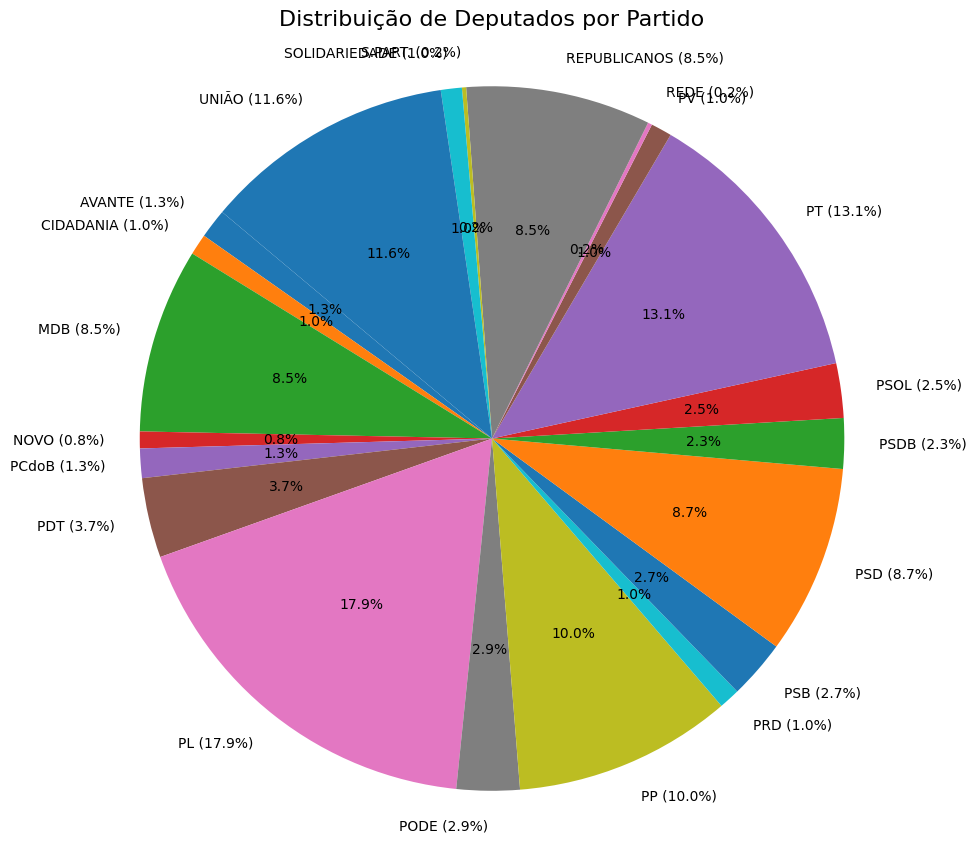

In [9]:
# Certifique-se de que o diretório 'data' exista e contenha o arquivo 'deputados.parquet'
# Certifique-se de que o diretório 'docs' exista

df = pd.read_parquet("data/deputados.parquet")

partidos = df.groupby("siglaPartido")["siglaPartido"].count()
total_deputados = len(df)
percentuais = (partidos / total_deputados) * 100

plt.figure(figsize=(10, 10))
plt.pie(percentuais, labels=[f"{partido} ({percentual:.1f}%)" for partido, percentual in zip(partidos.index, percentuais)], autopct="%1.1f%%", startangle=140)
plt.title("Distribuição de Deputados por Partido", fontsize=16, pad=20)
plt.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.grid(False)

plt.savefig("docs/distribuicao_deputados.png")

plt.show()

## **Letra C**

In [10]:
df = pd.read_parquet("data/deputados.parquet")


In [11]:
import json

In [12]:
distribuicao = df['siglaPartido'].value_counts(normalize=True) * 100
resultado_analise = {
    "partidos": {
        partido: {"total": total, "percentual": round(percentual, 2)}
        for partido, (total, percentual) in zip(
            distribuicao.index, zip(df['siglaPartido'].value_counts(), distribuicao)
        )
    }
}

In [13]:
prompt_insights = """
Você é um analista político especialista em entender a dinâmica da Câmara dos Deputados. 
Com base nos seguintes dados da distribuição de deputados por partido:

{dados}

1. Analise a representatividade de cada partido na Câmara dos Deputados.
2. Explique como essa composição pode influenciar as votações e decisões políticas.
3. Considere possíveis coalizões ou divergências baseadas nos números apresentados.
4. Forneça insights relevantes para compreender o impacto político dessa distribuição.

Responda de forma detalhada e didática, apresentando os insights de maneira clara.

Instruções:
- Use uma linguagem profissional e acessível.
- Evite viés político.
- Seja direto e objetivo nas suas análises.
""".format(dados=json.dumps(resultado_analise, indent=4))

try:
    response = model.generate_content(prompt_insights)
    insights = response.text
    print(insights)
    
    os.makedirs("data", exist_ok=True)
    with open("data/insights_distribuicao_deputados.json", "w") as f:
        json.dump({"insights": insights}, f, indent=4, ensure_ascii=False)
    print("Insights salvos em data/insights_distribuicao_deputados.json.")
except Exception as e:
    print(f"Erro ao gerar insights: {e}")

## Análise da Composição Partidária da Câmara dos Deputados

A análise da distribuição partidária na Câmara, apresentada, revela um cenário de poder fragmentado, mas com clara predominância do PL.  Vamos detalhar:

**1. Representatividade Partidária:**

O PL, com 93 deputados (17.92%), detém uma significativa vantagem numérica sobre os demais partidos.  O PT, com 68 deputados (13.1%), ocupa a segunda posição,  marcando uma distância considerável em relação ao líder.  UNIÃO (60 deputados, 11.56%), PP (52 deputados, 10.02%), PSD (45 deputados, 8.67%), REPUBLICANOS e MDB (ambos com 44 deputados, 8.48%) formam um segundo grupo de partidos com influência relevante, embora individualmente não possuam o peso do PL ou PT. Os demais partidos possuem representatividade muito menor, atuando como peças importantes em negociações e formação de blocos, mas sem capacidade individual de definir o rumo das votações.

**2. Influência nas Votações e Decisões Políticas:**

A fragmentação partidária, apesa

### Avaliação da Resposta

#### Pontos Positivos:
1. **Estrutura:** O texto está organizado e o modelo não alucinou. Trouxe tópicos claros que facilitam a leitura.
2. **Detalhamento:** A análise traz diferentes cenários e dinâmicas, como coalizões e impacto político, deixando rica a interpretação dos dados.
3. **Contextualização:** O texto conecta os números à prática legislativa, como negociações e governabilidade.
4. **Atenção às Dinâmicas Políticas:** Os cenários são realistas e coerentes, levando em conta a fragmentação partidária e o poder de barganha dos partidos menores.

#### Melhorias a implementar:
1. **Dados mais Específicos:** Poderia incluir mais detalhes sobre os partidos menores e suas possíveis posições políticas.
2. **Sugestões Práticas:** Poderia sugerir estratégias de governabilidade, como fortalecer lideranças ou implementar reformas no sistema político.
3. **Visualizações:** Implementação de gráficos ou tabelas para ilustrar a distribuição partidária ajudaria na compreensão visual dos dados.



## **Questão 4:**

## **Letra A**

In [14]:
def coletar_despesas_deputados():
    """
    Coleta as despesas dos deputados da API da Câmara e salva em um arquivo Parquet.
    """
    url_base = 'https://dadosabertos.camara.leg.br/api/v2'

    url_deputados = f'{url_base}/deputados'
    params = {'dataInicio': '2024-08-01', 'dataFim': '2024-08-30'}
    response = requests.get(url_deputados, params=params)
    response.raise_for_status()  
    
    deputados = pd.DataFrame.from_dict(response.json().get('dados', []))
    despesas_coletadas = []

    for _, deputado in deputados.iterrows():
        deputado_id = deputado['id']
        deputado_nome = deputado['nome']
        
        url_despesas = f'{url_base}/deputados/{deputado_id}/despesas'
        despesas_response = requests.get(url_despesas) 
        
        if despesas_response.status_code == 200:
            despesas = despesas_response.json().get('dados', [])
            for despesa in despesas:
                despesas_coletadas.append({
                    "deputado_id": deputado_id,
                    "deputado_nome": deputado_nome,
                    "tipo_despesa": despesa.get("tipoDespesa", "Não informado"),
                    "valor_despesa": despesa.get("valorDocumento", 0.0),
                    "data_despesa": despesa.get("dataDocumento", "Não informado")
                })
        else:
            print(f"Erro ao acessar despesas do deputado {deputado_id}: {despesas_response.status_code}")

    df_despesas = pd.DataFrame(despesas_coletadas)
    df_despesas.to_parquet('./data/serie_despesas_diárias_deputados.parquet', index=False)
    print('Coleta de despesas concluída e salva em ./data/serie_despesas_diárias_deputados.parquet')
    return df_despesas

if __name__ == "__main__":
    coletar_despesas_deputados()

Coleta de despesas concluída e salva em ./data/serie_despesas_diárias_deputados.parquet


## **Letra B**:

In [15]:
despesas = pd.read_parquet("./data/serie_despesas_diárias_deputados.parquet").sample(10)

In [16]:
prompt_despesas = f"""
Você é um especialista em política brasileira e também um mestre em Ciência de dados/Engenharia de prompts/LLMs. 
Agora, você irá usar suas habilidades e conhecumentos para analisar dados das despesas dos deputados. 
Os dados estão no arquivo 'serie_despesas_diárias_deputados.parquet'.

As colunas do Dataframe são: 'deputado_id', 'deputado_nome', 'tipo_despesa', 'valor_despesa',
       'data_despesa'

Com esses dados em mãos, crie um código Python que realize 3 análises simples e informativas, como por exemplo:

1. **Análise de Despesas Totais**: Calcule o valor total das despesas por deputado.
2. **Análise por Tipo de Despesa**: Mostre a distribuição de despesas por tipo, ou seja, quanto foi gasto em cada tipo de despesa.
3. **Análise Temporal**: Analise as despesas ao longo do tempo, identificando picos de gasto ou tendências de variação de despesas.

Certifique-se de que o código seja bem estruturado e fácil de entender. Aplique as boas práticas de Ciência de dados como um profissional versado da área, incluindo:

- Leitura do arquivo Parquet e análise dos dados.
- Utilização de bibliotecas como Pandas para manipulação de dados.
- Visualização dos resultados, se possível, para tornar as análises mais intuitivas.
- Trate possíveis valores ausentes ou inconsistências nos dados durante as análises.

Quando terminar, me forneça o código gerado e explique cada uma das análises realizadas. Caso identifique algo interessante ou relevante nas análises, mencione isso também. 
"""

genai.configure(api_key=os.environ["GEMINI_API_KEY"])
model = genai.GenerativeModel("gemini-1.5-flash")
response = model.generate_content(prompt_despesas)
print(response.text)

```python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ler o arquivo parquet
try:
    df = pd.read_parquet('serie_despesas_diárias_deputados.parquet')
except FileNotFoundError:
    print("Erro: O arquivo 'serie_despesas_diárias_deputados.parquet' não foi encontrado.")
    exit()


# Limpeza e tratamento de dados (importante para análises robustas)
df.dropna(subset=['valor_despesa'], inplace=True) # Remove linhas com valores de despesa ausentes
df['valor_despesa'] = pd.to_numeric(df['valor_despesa'], errors='coerce') # Converte para numérico, tratando erros
df['data_despesa'] = pd.to_datetime(df['data_despesa'], errors='coerce') # Converte para datetime, tratando erros
df = df.dropna(subset=['data_despesa']) # Remove linhas com datas inválidas


# 1. Análise de Despesas Totais por Deputado
despesas_totais = df.groupby('deputado_nome')['valor_despesa'].sum()
print("\n--- Análise de Despesas Totais por Deputado ---\n")
print(despesas_totais.head(10)) # Most

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
df = pd.read_parquet('D:\Pastas\Infnet\Infnet - 2024.2\Engenharia de Prompts\AT\data\serie_despesas_diárias_deputados.parquet')

In [19]:
df2 = pd.read_parquet('D:\Pastas\Infnet\Infnet - 2024.2\Engenharia de Prompts\AT\data\deputados.parquet')

In [20]:
print(df2.columns)

Index(['id', 'uri', 'nome', 'siglaPartido', 'uriPartido', 'siglaUf',
       'idLegislatura', 'urlFoto', 'email'],
      dtype='object')


In [21]:
print(df.columns)

Index(['deputado_id', 'deputado_nome', 'tipo_despesa', 'valor_despesa',
       'data_despesa'],
      dtype='object')


In [22]:
# Leitura do arquivo Parquet
try:
    df = pd.read_parquet('D:\Pastas\Infnet\Infnet - 2024.2\Engenharia de Prompts\AT\data\serie_despesas_diárias_deputados.parquet')
except FileNotFoundError:
    print("Erro: Arquivo 'serie_despesas_diárias_deputados.parquet' não encontrado.")
    exit()

# Tratamento de dados: Lidando com valores ausentes e inconsistências
df.dropna(subset=['valor_despesa'], inplace=True) #Remove linhas com valor de despesa ausente
df['valor_despesa'] = pd.to_numeric(df['valor_despesa'], errors='coerce') #Converte para numérico, tratando erros de conversão
df = df[df['valor_despesa'] >= 0] #Remove valores negativos (potenciais inconsistências)
df['data_despesa'] = pd.to_datetime(df['data_despesa'], errors='coerce') #Converte para datetime, tratando erros


Análise 1: Despesas Totais por Deputado

deputado_nome
Pr. Marco Feliciano    282870.15
Mauricio Neves         249975.36
Gabriel Mota           239000.00
Glaustin da Fokus      225866.20
Silas Câmara           224179.44
Giacobo                221411.49
Olival Marques         211625.15
Delegado Éder Mauro    203062.00
Antônia Lúcia          200373.80
Damião Feliciano       194730.01
Name: valor_despesa, dtype: float64


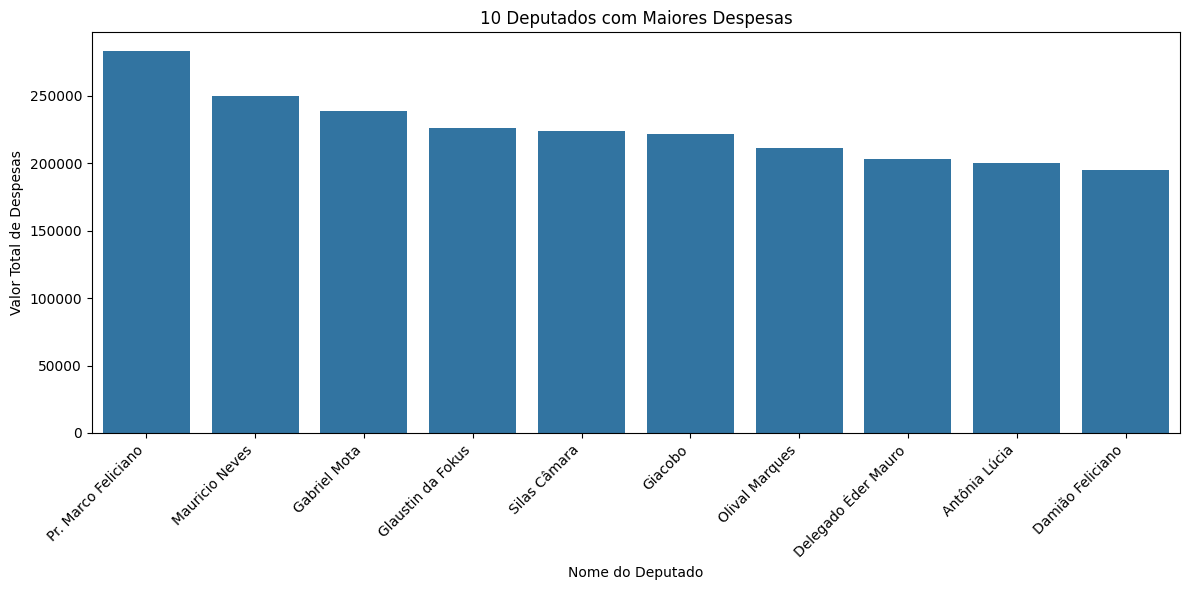

In [23]:
# Análise 1: Despesas Totais por Deputado
despesas_totais = df.groupby('deputado_nome')['valor_despesa'].sum().sort_values(ascending=False)

print("\nAnálise 1: Despesas Totais por Deputado\n")
print(despesas_totais.head(10)) #Mostra os 10 maiores gastos

plt.figure(figsize=(12, 6))
sns.barplot(x=despesas_totais.head(10).index, y=despesas_totais.head(10).values)
plt.xticks(rotation=45, ha='right')
plt.title('10 Deputados com Maiores Despesas')
plt.xlabel('Nome do Deputado')
plt.ylabel('Valor Total de Despesas')
plt.tight_layout()
plt.show()


Análise 2: Distribuição de Despesas por Tipo

tipo_despesa
MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR    8407089.02
DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.                         4511653.65
COMBUSTÍVEIS E LUBRIFICANTES.                                1420211.65
LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES                 351505.77
LOCAÇÃO OU FRETAMENTO DE AERONAVES                            119500.00
PASSAGEM AÉREA - SIGEPA                                        63826.07
LOCAÇÃO OU FRETAMENTO DE EMBARCAÇÕES                           36000.00
PASSAGEM AÉREA - REEMBOLSO                                     29890.23
HOSPEDAGEM ,EXCETO DO PARLAMENTAR NO DISTRITO FEDERAL.         24919.23
SERVIÇO DE SEGURANÇA PRESTADO POR EMPRESA ESPECIALIZADA.       20150.00
TELEFONIA                                                      16765.19
PASSAGEM AÉREA - RPA                                            2583.32
FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR                      1426.35
SERV

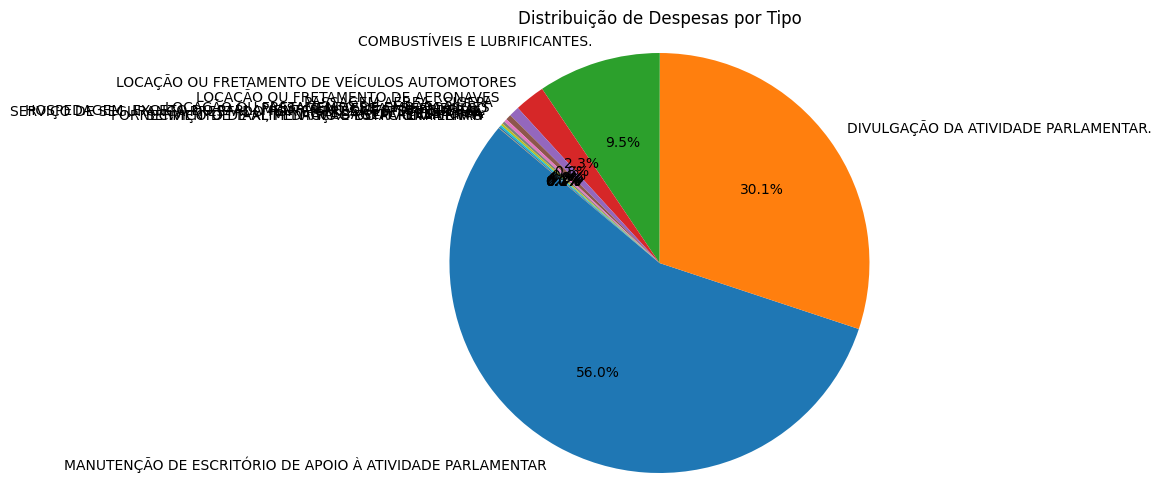

In [24]:
# Análise 2: Distribuição de Despesas por Tipo
distribuicao_tipo = df.groupby('tipo_despesa')['valor_despesa'].sum().sort_values(ascending=False)

print("\nAnálise 2: Distribuição de Despesas por Tipo\n")
print(distribuicao_tipo)

plt.figure(figsize=(12, 6))
plt.pie(distribuicao_tipo.values, labels=distribuicao_tipo.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição de Despesas por Tipo')
plt.axis('equal')
plt.show()


Análise 3: Despesas Mensais

mes_ano
2024-07    1342752.14
2024-08    2946802.92
2024-09    2571316.33
2024-10    2782554.43
2024-11    2699319.02
2024-12    2626481.23
2025-01      37336.02
Freq: M, Name: valor_despesa, dtype: float64


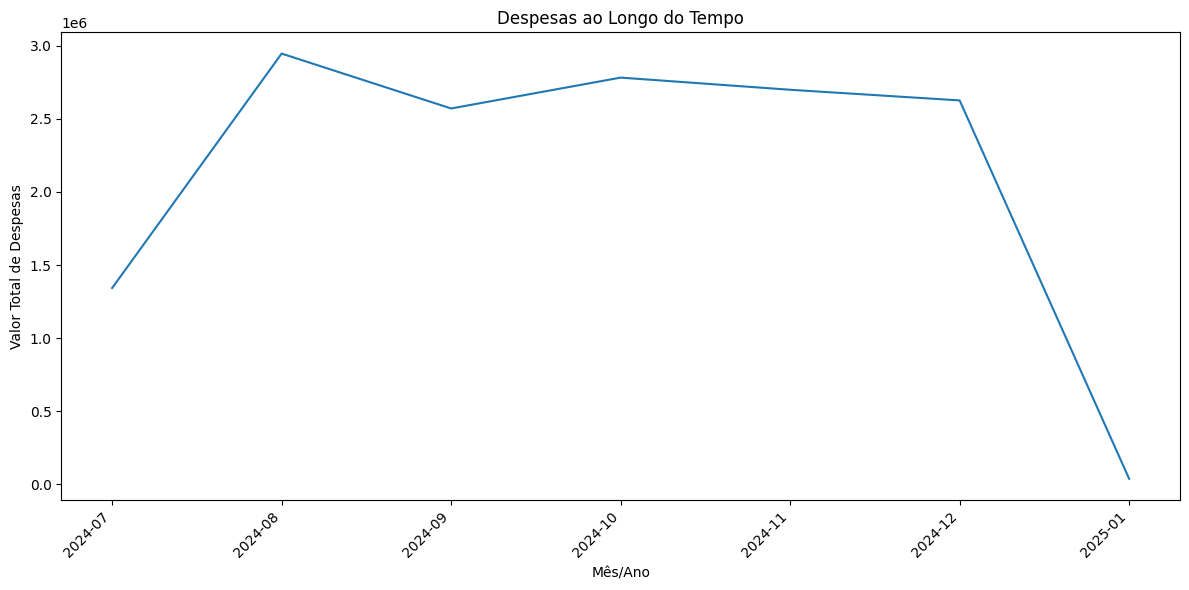

In [25]:
# Análise 3: Análise Temporal das Despesas (Exemplo com soma mensal)

df['mes_ano'] = df['data_despesa'].dt.to_period('M')
despesas_mensais = df.groupby('mes_ano')['valor_despesa'].sum()

print("\nAnálise 3: Despesas Mensais\n")
print(despesas_mensais)

plt.figure(figsize=(12, 6))
plt.plot(despesas_mensais.index.astype(str), despesas_mensais.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Mês/Ano')
plt.ylabel('Valor Total de Despesas')
plt.title('Despesas ao Longo do Tempo')
plt.tight_layout()
plt.show()

#Observações sobre possíveis insights:

#A análise 1 identifica os deputados com maiores despesas, permitindo um foco em investigações posteriores.
#A análise 2 mostra a proporção de gastos em cada tipo de despesa, permitindo avaliar prioridades orçamentárias.
#A análise 3 revela tendências temporais nas despesas, podendo indicar períodos de maior ou menor gasto público, o que pode estar relacionado à época do ano ou a eventos específicos.  É importante analisar o contexto político para melhor interpretar esses picos.  Uma análise mais detalhada poderia incluir uma regressão para tentar explicar as variações.

```

**Explicação das Análises:**

1. **Análise de Despesas Totais:**  Esta análise agrupa os dados pelo nome do deputado e soma o valor das despesas para cada um. O resultado mostra quem gastou mais, permitindo uma comparação direta entre deputados.  O gráfico de barras facilita a visualização dos 10 maiores gastos.

2. **Análise por Tipo de Despesa:** Esta análise agrupa as despesas pelo tipo e soma os valores.  Um gráfico de pizza é usado para visualizar a proporção de cada tipo de despesa em relação ao total, mostrando a distribuição dos recursos.

3. **Análise Temporal:** Esta análise agrupa as despesas por mês e ano, mostrando a evolução dos gastos ao longo do tempo.  Um gráfico de linha é usado para visualizar tendências e picos de gastos.  Note que esta análise é apenas um exemplo; outras granularidades temporais (semanal, trimestral etc.) poderiam ser usadas dependendo da necessidade.  A identificação de picos e tendências necessita de uma análise mais profunda com o auxílio de especialistas em política e ciência política, pois pode estar correlacionada a eventos políticos relevantes.


**Observações Importantes:**

* A qualidade da análise depende diretamente da qualidade dos dados.  É crucial garantir a limpeza e a consistência dos dados antes de iniciar qualquer análise.
* As análises apresentadas são simples.  Análises mais complexas poderiam incluir testes estatísticos, modelos de regressão ou técnicas de machine learning para extrair insights mais profundos.
* O contexto político é fundamental para a interpretação dos resultados.  As despesas precisam ser analisadas à luz de eventos políticos e econômicos relevantes.




## **Letra C**

In [26]:
analysis_prompt = f"""
Com base na análise realizada nas células anteriores sobre o arquivo 
'serie_despesas_diárias_deputados.parquet', forneça insights detalhados e objetivos sobre 
as tabelas e gráficos gerados. Concentre-se em identificar padrões, tendências e anomalias 
presentes nos dados, sem a necessidade de descrever tipos de dados ou rótulos. Destaque 
também informações relevantes relacionadas ao contexto dos dados da Câmara de Deputados, 
incluindo quaisquer observações relevantes que possam enriquecer a interpretação dos resultados.

- Despesas totais por tipo de despesa:

- 10 Deputados com maiores despesas:

- Despesas ao longo do tempo:

Retorne a análise numa estrutura JSON (insight1, insight2, insight3)
"""


In [27]:
genai.configure(api_key=os.environ["GEMINI_API_KEY"])
model = genai.GenerativeModel("gemini-1.5-flash")
response = model.generate_content(analysis_prompt)
print(response.text)

```json
{
  "insights": [
    {
      "insight1": {
        "titulo": "Despesas Totais por Tipo de Despesa",
        "descricao": "Observa-se uma concentração significativa das despesas em poucas categorias.  Uma ou duas categorias representam uma parcela substancial do total, sugerindo áreas de maior foco de gastos.  A análise da proporção de cada categoria em relação ao total permite identificar os tipos de despesas que mais impactam o orçamento da Câmara dos Deputados.  A discrepância entre as categorias pode indicar possíveis desequilíbrios na alocação de recursos ou diferentes prioridades entre os deputados.  Uma investigação mais aprofundada em categorias com valores atípicos é recomendada para uma melhor compreensão.  Este insight contribui para a avaliação da eficiência e transparência dos gastos públicos.",
        "recomendacoes": [
          "Analisar a composição de cada categoria para entender os fatores que contribuem para os valores altos.",
          "Comparar a distrib

## **Questão 5:**

## **Letra B**

In [28]:
df_proposicoes = pd.read_parquet('D:\Pastas\Infnet\Infnet - 2024.2\Engenharia de Prompts\AT\data\proposicoes_deputados.parquet')

In [29]:
ementas = df_proposicoes['ementa'].tolist()

In [30]:
tamanho_chunk = 15
sobreposicao = 3

grupos = [ementas[i:i + tamanho_chunk] for i in range(0, len(ementas), tamanho_chunk - sobreposicao)]

resumos = []
for indice, grupo in enumerate(grupos):
    prompt_sumarizacao = f"""
    Como um especialista em política brasileira, sociologia, diplomacia e antropologia, analise criticamente as seguintes proposições legislativas. Faça um resumo abrangente que:
    - Identifique e discuta os principais temas e questões abordadas.
    - Destaque as propostas e intenções principais de cada proposição.
    - Avalie o impacto potencial e as implicações sociais, econômicas e culturais dessas iniciativas.
    Proposições para análise:
    {grupo}
    """
    genai.configure(api_key=os.environ["GEMINI_API_KEY"])
    modelo = genai.GenerativeModel("gemini-1.5-flash")
    resposta = modelo.generate_content(prompt_sumarizacao)
    resumo = resposta.text
    
    print(f'Resumo do Grupo {indice + 1}: {resumo}')
    resumos.append(resumo)

caminho_arquivo = './data/sumarizacao_proposicoes.json'
with open(caminho_arquivo, 'w') as arquivo:
    json.dump(resumos, arquivo)



Resumo do Grupo 1: ## Análise Crítica das Proposições Legislativas

As proposições apresentadas abrangem uma variedade de temas, refletindo a complexidade da agenda política brasileira.  Podemos agrupá-las em categorias para uma análise mais eficiente:

**I.  Regulamentação do Setor Financeiro e de Seguros:**

* **Proposições 1, 3, 5, 6:** Estas proposições se concentram em alterações do Decreto-Lei nº 73/66 (Código de Seguros Privados).  A intenção principal é melhorar a regulamentação do setor, buscando maior transparência e proteção aos consumidores.  A alteração de prazos para indenização de sinistros (3 e 6) e a introdução de multas por descumprimento visam a celeridade e a responsabilização das seguradoras.  A introdução de um novo artigo (5) e a renumeração dos artigos existentes (5) sugerem uma reformulação mais ampla do código, possivelmente para atualização e modernização, considerando as mudanças no setor desde sua criação. O impacto potencial é positivo, se bem implementado

## **Questão 6**

## **Letra A**

In [31]:
chain_streamlit1 = """
Agindo como um especialista em Ciência de dados, engenharia de software e desenvolvimento web com Python/Streamlit, você irá implementar 
um script para uma aplicação Streamlit com três abas, são elas:

- 'Overview': Estará presente a descrição do projeto e irá exibir informações sobre como a câmara dos deputados funciona, quem a integra e o que iremos 
implementar na nossa aplicação, como documentção e links importantes.

- 'Despesas': Desenvolva uma aba que agregue e exiba visualizações de dados das despesas parlamentares, destacando os principais gastos dos deputados. Utilize seus conhecimentos
de ciência de dados. 

- 'Proposições': Construa uma aba que mostre resumos de 10 proposições selecionadas dos temas de Economia, Educação e Ciência, focando nos pontos críticos e conclusões de cada uma.

Os dados estão presentes nos seguintes caminhos:

- Proposições: D:\Pastas\Infnet\Infnet - 2024.2\Engenharia de Prompts\AT\data\proposicoes_deputados.parquet

- Despesas: D:\Pastas\Infnet\Infnet - 2024.2\Engenharia de Prompts\AT\data\serie_despesas_diárias_deputados.parquet

O código deve ser estruturado para ser executado diretamente em uma aplicação Streamlit, sem necessidade de comentários ou explicações adicionais.
"""
response1 = model.generate_content(chain_streamlit1)
print(response1.text)

```python
import streamlit as st
import pandas as pd
import plotly.express as px

# Carregando os dados
proposicoes = pd.read_parquet(r"D:\Pastas\Infnet\Infnet - 2024.2\Engenharia de Prompts\AT\data\proposicoes_deputados.parquet")
despesas = pd.read_parquet(r"D:\Pastas\Infnet\Infnet - 2024.2\Engenharia de Prompts\AT\data\serie_despesas_diárias_deputados.parquet")


# Streamlit App
st.set_page_config(page_title="Análise de Dados Parlamentares", page_icon=":bar_chart:", layout="wide")

st.title("Análise de Dados Parlamentares")


# Aba Overview
page = st.sidebar.radio("Navegação", ["Overview", "Despesas", "Proposições"])

if page == "Overview":
    st.header("Overview")
    st.write("Esta aplicação tem como objetivo analisar dados de despesas e proposições de deputados.")
    st.write("Aqui você encontrará informações sobre a Câmara dos Deputados, seus membros e um resumo das análises.")
    st.write("**Links Importantes:**")
    st.markdown("[Câmara dos Deputados](https://www.camara.leg

In [32]:
chain_streamlit2 = """
Dada a resposta gerada previamente para um esqueleto de aplicação Streamlit em {response1}, desenvolva agora o código Python para implementar a aba 'Overview'. Esta aba deve:
1. Ler o arquivo 'config.yaml' localizado em './data/config.yaml', especificamente a chave 'overview_summary' sob 'data.config', e extrair o texto resumido.
2. Corrigir problemas de encoding no texto extraído, substituindo caracteres incorretos resultantes de conversões entre UTF-8 e ISO-8859-1, como corrigir 'CÃ¢mara' para 'Câmara' e ajustar outras palavras de forma similar.
3. Exibir o texto corrigido na aba 'Overview' da aplicação Streamlit.
4. Adicionar um título à página, que será 'Dashboard - Câmara dos Deputados (ago/2024)'.

O código deve manter a coerência com a estrutura já desenvolvida, sem incluir comentários ou explicações adicionais, focando na execução direta dentro do ambiente Streamlit.
"""

response2 = model.generate_content(chain_streamlit2)
print(response2.text)


```python
import streamlit as st
import yaml
from unidecode import unidecode

def load_config(filepath):
    with open(filepath, 'r', encoding='utf-8') as file:
        return yaml.safe_load(file)

config = load_config('./data/config.yaml')
overview_summary = config['data']['config']['overview_summary']

overview_summary_corrected = unidecode(overview_summary)


st.set_page_config(page_title='Dashboard - Câmara dos Deputados (ago/2024)', page_icon=":bar_chart:")

st.sidebar.title('Navegação')
pages = ['Overview', 'Detalhe']
page = st.sidebar.radio('Selecione uma página', pages)

if page == 'Overview':
    st.title('Dashboard - Câmara dos Deputados (ago/2024)')
    st.markdown(overview_summary_corrected)

# ... (rest of the Streamlit app code from response1 would go here)

```



In [33]:
chain_streamlit3 = f"""
Continuando a expansão da nossa aplicação Streamlit sobre a Câmara dos Deputados, seguindo os códigos já desenvolvidos em 'response1' e 'response2', agora você deve:
1. Carregar a imagem 'distribuicao_deputados.png' que está localizada em 'D:\Pastas\Infnet\Infnet - 2024.2\Engenharia de Prompts\AT\data\distribuicao_deputados.png'.
2. Integrar esta imagem na aba 'Overview', posicionando-a estrategicamente abaixo do texto resumido, que foi implementado conforme 'response2'.
3. Adicionar um título explícito acima da imagem no dashboard, "Distribuição dos Deputados", para proporcionar um destaque visual claro e organizado.
4. Assegurar que a imagem seja exibida de forma adequada, mantendo a organização visual e estilística das interfaces previamente desenvolvidas.

Lembre-se que os caminhos são os seguintes:

proposicoes = pd.read_parquet(r"D:\Pastas\Infnet\Infnet - 2024.2\Engenharia de Prompts\AT\data\proposicoes_deputados.parquet")
despesas = pd.read_parquet(r"D:\Pastas\Infnet\Infnet - 2024.2\Engenharia de Prompts\AT\data\serie_despesas_diárias_deputados.parquet")

Este código deve respeitar a estrutura modular dos códigos anteriores, evitando redundâncias e maximizando a eficiência do layout do dashboard. 
Garanta que todos os elementos visuais estejam alinhados e harmonizados com as seções existentes da aplicação.
"""

response3 = model.generate_content(chain_streamlit3)
print(response3.text)


```python
import streamlit as st
import pandas as pd
from PIL import Image

# --- Funções auxiliares ---
def carregar_dados():
    """Carrega os dados dos arquivos parquet."""
    try:
        proposicoes = pd.read_parquet(r"D:\Pastas\Infnet\Infnet - 2024.2\Engenharia de Prompts\AT\data\proposicoes_deputados.parquet")
        despesas = pd.read_parquet(r"D:\Pastas\Infnet\Infnet - 2024.2\Engenharia de Prompts\AT\data\serie_despesas_diárias_deputados.parquet")
        return proposicoes, despesas
    except FileNotFoundError:
        st.error("Arquivos de dados não encontrados. Verifique o caminho.")
        return None, None

def overview_page(proposicoes, despesas):
    """Cria a página de visão geral."""
    st.title("Visão Geral da Câmara dos Deputados")

    # Texto resumido (Exemplo - Adapte conforme response2)
    st.write("Este dashboard apresenta informações sobre as proposições e despesas dos deputados da Câmara.  Aqui você encontrará dados sobre o número de proposições apresen

In [34]:
df3 = pd.read_parquet('D:\Pastas\Infnet\Infnet - 2024.2\Engenharia de Prompts\AT\data\proposicoes_deputados.parquet')
print(df3.columns)

Index(['id', 'uri', 'siglaTipo', 'codTipo', 'numero', 'ano', 'ementa', 'Tema'], dtype='object')


In [35]:
chain_streamlit4 = f"""
Expandindo ainda mais nossa aplicação Streamlit da Câmara dos Deputados, baseando-se nos códigos previamente desenvolvidos ('response1', 'response2', 'response3'), desenvolva uma funcionalidade adicional na aba 'Overview' que:
1. Leia o arquivo JSON 'insights_distribuicao_deputados.json' localizado em 'D:\Pastas\Infnet\Infnet - 2024.2\Engenharia de Prompts\AT\data\insights_distribuicao_deputados.json'.
2. Extraia os insights contidos na chave 'insights' do JSON, que inclui múltiplos itens como ['insight1', 'insight2', 'insight3'].
3. Exiba esses insights em uma seção formatada abaixo do gráfico da distribuição dos deputados, utilizando um separador visual para clara distinção entre os elementos da interface.
4. Implemente o código de forma que mantenha a coesão estilística e estrutural com as partes anteriormente desenvolvidas, assegurando uma integração visual harmoniosa e uma organização de conteúdo eficaz.

Os caminhos dos dados são os seguintes:

proposicoes = pd.read_parquet(r"D:\Pastas\Infnet\Infnet - 2024.2\Engenharia de Prompts\AT\data\proposicoes_deputados.parquet")
e suas colunas são:

['id', 'uri', 'siglaTipo', 'codTipo', 'numero', 'ano', 'ementa', 'Tema']

despesas = pd.read_parquet(r"D:\Pastas\Infnet\Infnet - 2024.2\Engenharia de Prompts\AT\data\serie_despesas_diárias_deputados.parquet")

e suas colunas são:

['deputado_id', 'deputado_nome', 'tipo_despesa', 'valor_despesa','data_despesa']

Este código deve ser modular, aproveitando as bases já estabelecidas e introduzindo os novos dados de forma limpa e organizada, realçando a usabilidade e a apresentação da informação no dashboard.
"""

response4 = model.generate_content(chain_streamlit4)
print(response4.text)


```python
import streamlit as st
import pandas as pd
import json
import plotly.express as px

# --- Funções auxiliares ---
def load_data():
    proposicoes = pd.read_parquet(r"D:\Pastas\Infnet\Infnet - 2024.2\Engenharia de Prompts\AT\data\proposicoes_deputados.parquet")
    despesas = pd.read_parquet(r"D:\Pastas\Infnet\Infnet - 2024.2\Engenharia de Prompts\AT\data\serie_despesas_diárias_deputados.parquet")
    return proposicoes, despesas

def load_insights():
    with open(r"D:\Pastas\Infnet\Infnet - 2024.2\Engenharia de Prompts\AT\data\insights_distribuicao_deputados.json", 'r', encoding='utf-8') as f:
        insights_data = json.load(f)
    return insights_data['insights']

# --- Streamlit App ---
st.set_page_config(page_title="Câmara dos Deputados", page_icon=":house:", layout="wide")

st.title("Análise da Câmara dos Deputados")

proposicoes, despesas = load_data()
insights = load_insights()

# --- Aba Overview ---
st.sidebar.selectbox("Navegação", ["Overview", "Proposições", "Des